# Homework 7 - Logistic Regression, SVM, k-means, Gaussian Mixture Model

Make sure you have downloaded:
1. spkies.csv
2. synthetic_spike_labels.csv

## 0 Introduction and Loading of Data:

We revisit the spike data from previous section and homework. You may read those Jupyter notebooks for further introduction. 

Before performing clustering, we reduce the dimension of the data by projecting it to the first 2 principal components, and working in the principal component axes.

Run the following cells to load, visualize, and preprocess the data.

### Load data and visualize first 20 spikes
Store spike data as `X` and synthetically generated spike labels as `y`.
- Since this homework will primarily use sklearn packages, the dimensions of X is (number of samples) by (number of features).

(3298, 70)
(3298,)


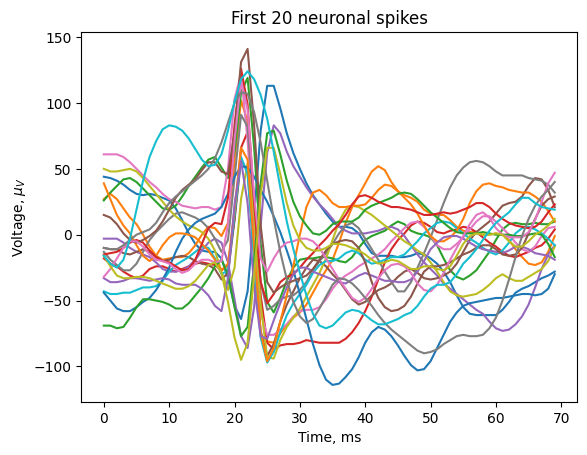

In [1]:
# ------  DO NOT CHANGE CODE IN THIS CELL ------
import numpy as np
import matplotlib.pyplot as plt

# spikes
X = np.loadtxt('spikes.csv', delimiter=',').T
m, n = X.shape
print(X.shape)

# synthetic labels
y = np.loadtxt('synthetic_spike_labels.csv', delimiter=',')
print(y.shape)

# visualize first 20 spikes
for i in range(20):
    plt.plot(np.arange(n),X[i,:])
plt.xlabel(r'Time, ms'); plt.ylabel(r'Voltage, $\mu_V$'); 
plt.title('First 20 neuronal spikes'); plt.show()
# -----------------------------------------------

### Dimensionality Reduction with PCA

PCA has been applied to reduce the data from 70 dimensions to 2 dimensions, by choosing the largest 2 principal components.

(3298, 2)


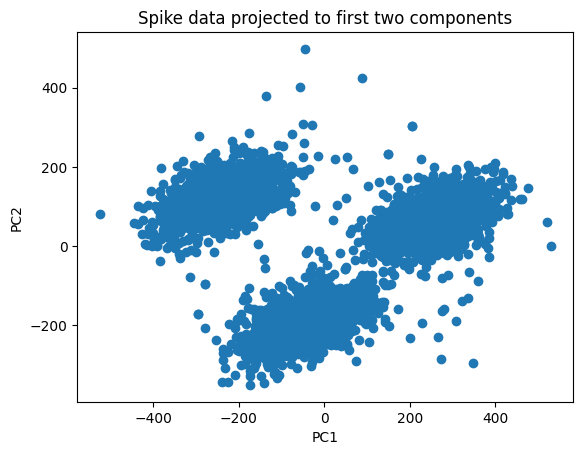

In [2]:
# ------  DO NOT CHANGE CODE IN THIS CELL ------
from sklearn.decomposition import PCA

model = PCA(n_components=2)
X = model.fit_transform(X)
print(X.shape)

plt.scatter(X[:,0], X[:,1])
plt.title('Spike data projected to first two components')
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.show()
# -----------------------------------------------

## 1 (Supervised) Logistic Regession
### 1.1 Set up Pipeline and Gridsearch
**Task:**
1. [1 pt] Import `GridSearchCV`, `Pipeline`, and `StandardScaler`.
2. [2 pt] Write a function ```best()```, which 
    - takes as input: 
        - a pipeline object ```pipe```
        - dictionary of parameters ```grid``` to perform a grid search using GridSearchCV to find the optimal hyperparameters.
        - data `X` and `y`
    - returns the best model based on gridsearch
    - Use 3-fold cross-validation and set GridSearchCV scoring to "accuracy".
    - You can adapt it from section notebooks.

In [3]:
# TOD Packages: Grid Search, Pipeline, Scaling
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# TOD complete function
def best(pipe, grid, X, y):
    gridsearch = GridSearchCV(pipe, grid, cv=3, scoring='accuracy')
    gridsearch.fit(X, y)
    return gridsearch.best_estimator_

### 1.2 Build Logistic Regression model
**Task:**
1. [3 pt] Use best() function to find the best logistic regression model, `lr_model`.
    - For the pipeline, include a standard scaler.
    - For the grid, set penalty = ('l2', 'l1'), solver = ['liblinear'], C = [1e-2, 1e-1, 1e0, 1e1, 1e2].
2. [1 pt] Print the best model.

In [4]:
# TOD Logistic Regression with pipeline
from sklearn.linear_model import LogisticRegression

pipe_lr = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression())])
lr_grid = {'logreg__penalty': ['l2', 'l1'], 'logreg__solver': ['liblinear'], 'logreg__C': [0.01, 0.1, 1, 10, 100]}
lr_model = best(pipe_lr, lr_grid, X, y)

# print
print(lr_model)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(C=1, penalty='l1', solver='liblinear'))])


### 1.3 Set up plot function
**Task:**

Complete the function `plot_labels_and_decbdy(label, data, model, modelname)` that displays a scatter plot of data points with their labels and the decision boundary of the model.
- `data` is the coordinate values of the features.
- `label` is a vector of labels for the data.
- `model` is the sklearn model object that you will use to generate the decision boundary.
- `modelname` is a string that will be used for your plot title.
1. [1 pt] Scatter plot of data with their labels.
2. [1 pt] Complete code for the meshgrid.
3. [1 pt] Compute predicted labels `pred` for each point on meshgrid, based on input model.
4. [1 pt] Make an informative title that uses the argument modelname.

In [5]:
def plot_labels_and_decbdy(label, data, model, modelname):
    # TOD scatter plot
    plt.scatter(data[:, 0], data[:, 1], c=label, edgecolor='k', cmap=plt.cm.Set1)
    
    # TOD complete meshgrid
    x_min, x_max = data[:, 0].min() - 20, data[:, 0].max() + 20
    y_min, y_max = data[:, 1].min() - 20, data[:, 1].max() + 20
    n_dec_bdy = 1000
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, n_dec_bdy), np.linspace(y_min, y_max, n_dec_bdy))

    # TOD labels for each point in meshgrid
    pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
    pred = pred.reshape(xx.shape)

    # Put the result into a color plot
    plt.imshow(pred, interpolation='nearest',
                extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                cmap=plt.cm.Paired,
                aspect='equal', origin='lower', alpha=0.7)

    # TOD Make an informative title that uses the argument modelname
    plt.title(modelname)
    plt.xlabel('PC1'); plt.ylabel('PC2'); plt.show()

### 1.4 Plot
**Task:**
1. [1 pt] Use `plot_labels_and_decbdy` to plot the data points, their true labels, and the decision boundary of the logistic regression model.

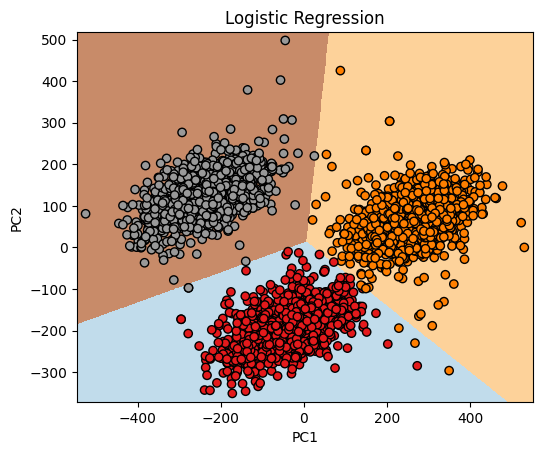

In [6]:
# TOD plot
plot_labels_and_decbdy(y.ravel(), X, lr_model, 'Logistic Regression')

## 2 (Supervised) Suppor Vector Machine
### 2.1 Build SVM model
**Task:**
1. [3 pt] Use best() function to find the best SVM model.
    - For the pipeline, include a standard scaler.
    - For the grid, set kernel = ('rbf', 'sigmoid'), C = [1e-2, 1e-1, 1e0, 1e1, 1e2].
2. [1 pt] Print the best model.

In [7]:
# TOD SVM with pipeline
from sklearn.svm import SVC

pipe_svm = Pipeline([
    ('scaler', StandardScaler()), 
    ('svm', SVC())
])
svm_grid = {
    'svm__kernel': ['rbf', 'sigmoid'],
    'svm__C': [0.01, 0.1, 1, 10, 100]
}
svm_model = best(pipe_svm, svm_grid, X, y)

print(svm_model)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(C=1))])


### 2.2 Plot
**Task:**
1. [1 pt] Use `plot_labels_and_decbdy` to plot the data points, their true labels, and the decision boundary of the SVM model.

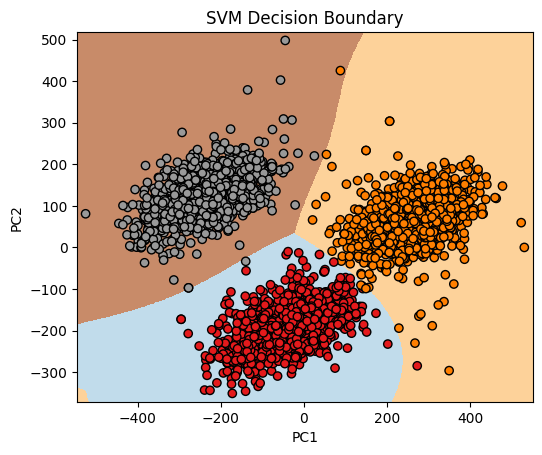

In [8]:
# TOD plot
plot_labels_and_decbdy(y.ravel(), X, svm_model, 'SVM Decision Boundary')


## 3 (Unsupervised) K means
### 3.1 Choose number of clusters via elbow plot
In the unsupervised setting, we do not have labels `y` anymore!

So, we need to identify how many clusters we want in the unsupervised model. Suppose we don't know a priori how many clusters there are likely to be. Here is one way to use kmeans to select the appropriate number of clusters.

**Task:**
1. Complete the code below in the for-loop.
    - [1 pt] Define `kmeans_mdl`. Set n_clusters = num_clusters, n_init=100, init='k-means++', random_state=0.
    - [1 pt] Fit kmeans_mdl to the data `X`.
2. [1 pt] Run the cell and produce the plot with appropriate axis labels. 
3. [1 pt] What does the plot suggest about the correct number of clusters we should be using? How did you come to your conclusion? Is that consistent with what you observed in the previous parts?
    
    **Ans:** The turning point, the elbow is at point 3. That means the data should be concentrated within 3 clusters, and it is consistent with what we've observed in the previous parts.
    

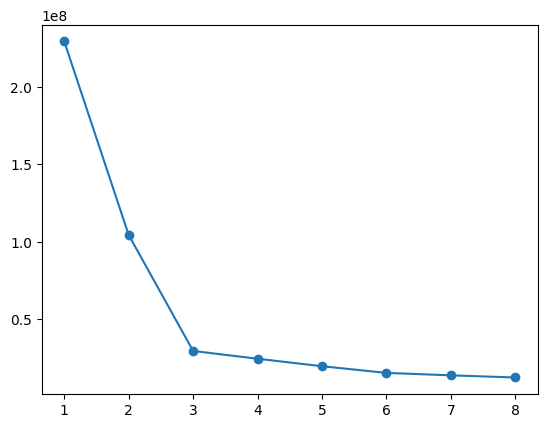

In [14]:
from sklearn.cluster import KMeans
n_clusters_to_check = 8
klist = np.arange(1,n_clusters_to_check+1)
slist = np.zeros(n_clusters_to_check)

for i in range(len(klist)):
    # TOD define k means and fit data
    k = klist[i]
    kmeans_mdl = KMeans(n_clusters=k, n_init=100, init='k-means++', random_state=0)
    kmeans_mdl.fit(X)
    slist[i] = kmeans_mdl.inertia_

plt.plot(klist, slist, 'o-')
plt.xlabel(''); plt.ylabel(''); plt.show()

### 3.2 Build k means model
Use the number of clusters you identified in the previous part.
**Task:**
1. [1 pt] Define `km_model`, the KMeans object 
    -   Set init = 'k-means++', n_clusters to what you inferred in the previous part, n_init = 100, random_state = 0.
2. [1 pt] Fit the model to the projected data.
3. [1 pt] Predict the clusters and store them as `Cpred_km`.

In [15]:
# TOD define, fit, and predict k means
km_model = KMeans(init='k-means++', n_clusters=3, n_init=100, random_state=0)
km_model.fit(X)
Cpred_km = km_model.predict(X)

### 3.3 Plot
1. [1 pt] Use `plot_labels_and_decbdy` to plot the data points, their predicted labels, and the decision boundary of the k-means model.

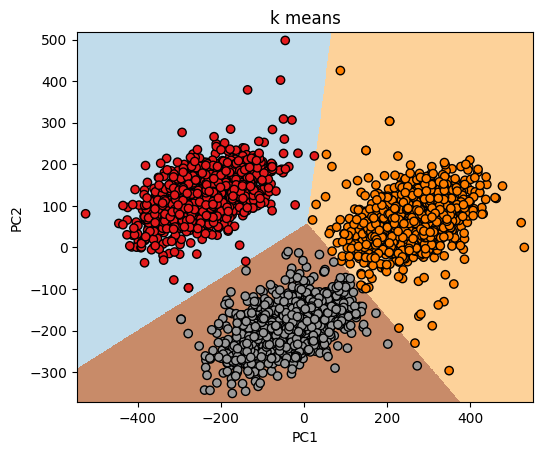

In [16]:
# TOD plot
plot_labels_and_decbdy(Cpred_km, X, km_model, 'k means')

## 4 (Unsupervised) Gaussian Mixture Models
### 4.1 Build GMM model

**Task:**
1. [1 pt] Define `gmm_model`, the GaussianMMixture object.
    - Set init n_components = 3.
2. [1 pt] Fit the model to the projected data.
3. [1 pt] Predict the clusters and store them as `Cpred_gmm`.

In [17]:
from sklearn.mixture import GaussianMixture

# TOD define, fit, and predict GMM
gmm_model = GaussianMixture(n_components=3, random_state=0)
gmm_model.fit(X)
Cpred_gmm = gmm_model.predict(X)

### 4.2 Plot
1. [1 pt] Use `plot_labels_and_decbdy` to plot the data points, their predicted labels, and the decision boundary of the GMM model.

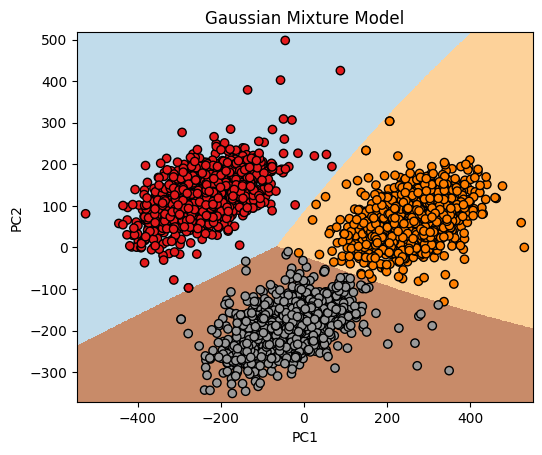

In [18]:
# TOD plot
plot_labels_and_decbdy(Cpred_gmm, X, gmm_model, 'Gaussian Mixture Model')

## 5 Discussion
1. [1 pt] What is a key difference between the process of **supervised learning** (logistic regression/SVM) and **unsupervised learning** (k-means/GMM)? Your response should be related to the (un)supervised-ness of the approaches. We are looking for evidence that you are reflecting on the paradigms of these approaches, a short response is enough.
    
    **Ans:** The key difference between supervised and unsupervised learning is the presence or absence of labelled data. In supervised data, like the logistic regression and SVM we did, there is labelled data y to train our model with best and fitted to both X and y. Contrastly, unsupervised approaches don't, like k-means and GMM, so they were fit only to X without the labels y. This is done to try to find patterns in the data.

2. [1 pt] Compare the difference in shape of the decision boundaries between **logistic regression and support vector machines**. 

    **Ans:** Logistic regression tends to result in linear decision boundaries (due to wx + b inside the sigma), and SVM has more curves since it can handle nonlinear data through kernel functions (here we tried rbf and sigmoid). 

3. [1 pt] Compare the differences in shape of the decision boundaries between **k-means and gaussian mixture models**. 

    **Ans:** k-means implicitly assumes that data points in each clusters are modeled within a sphere around a cluster centroid whereas gmm assumes clusters follow a Gaussian distribution. In two dimensions, k-means decision boundaries look more like linear lines, which can be shown here. GMM boundaries are probabilistic, so they have softer boundaries as can be seen, that can look a little curvey possibly.